# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
a = np.zeros(10)
a[4] = 1
a = a.reshape((2, 5)) 
a

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
a = np.arange(10, 50)
a = a[::-1]
a = a[1::2]
a

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [4]:
a = np.arange(0, 9).reshape((3,3))
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [5]:
a = np.random.randn(4*3*2).reshape((4,3,2))
a.max(), a.min()

(1.3437325898840695, -1.4574747236237993)

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [6]:
a = np.random.randn(6*4).reshape((6,4))
b = np.random.randn(4*3).reshape((4,3))
a.dot(b)

array([[-0.53365247,  1.15931891,  1.2321491 ],
       [ 3.70133155,  0.86587029, -0.4740273 ],
       [-3.44105147, -0.84808985,  1.11090384],
       [-4.9933959 ,  2.17372981, -0.77360438],
       [ 0.72821229,  0.06118642, -1.97287477],
       [ 1.21098884, -1.53113744, -1.61027426]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [7]:
a = (100*np.random.randn(7*7)).reshape((7,7))
a.mean(), a.std()

(1.8869491367391173, 87.45994162043426)

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Загрузите датасет Tips из набора датасетов seaborn

In [9]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Посмотрите на первые 5 строчек

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [11]:
tips.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [12]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

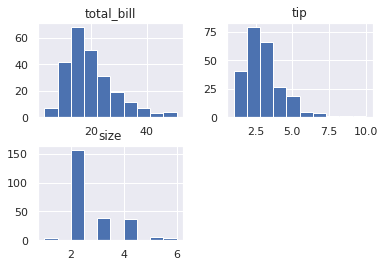

In [13]:
tips.hist()

### Найдите максимальное значение 'total_bill'

In [14]:
tips['total_bill'].max()

50.81

### Найдите количество курящих людей

In [15]:
tips[tips['smoker'] == 'Yes'].shape[0]

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [16]:
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [17]:
tips[tips['total_bill'] > tips['total_bill'].median()].groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [18]:
tips['smoker'] = tips['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
tips.groupby('smoker')['tip'].mean()

smoker
1    3.008710
0    2.991854
Name: tip, dtype: float64

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

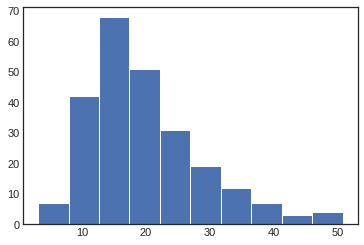

In [19]:
plt.style.use('seaborn-white')
plt.hist(tips['total_bill'])

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

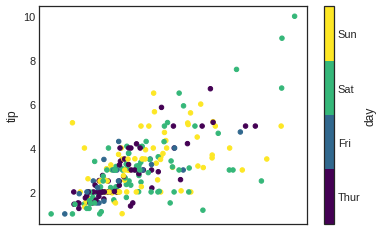

In [20]:
tips.plot.scatter(x='total_bill', y='tip', c='day', cmap='viridis');

### Постройте pairplot

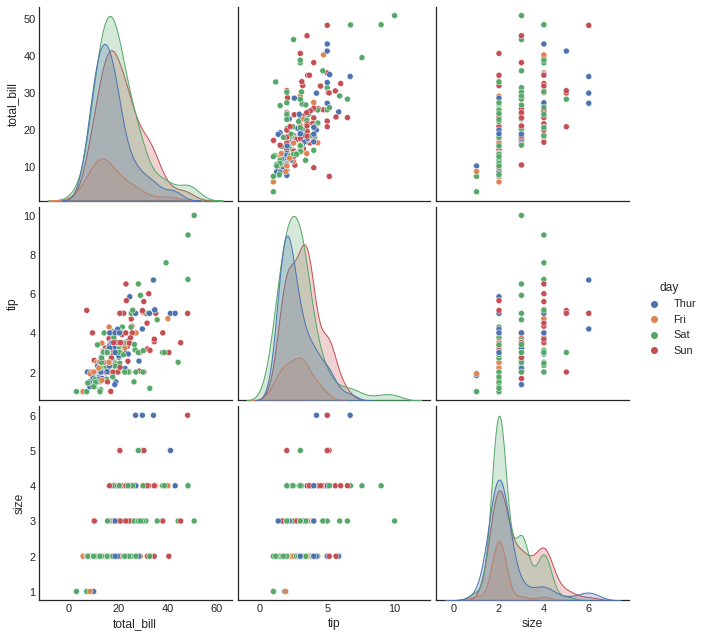

In [21]:
sns.pairplot(tips, hue='day', height=3);

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<AxesSubplot:xlabel='day'>

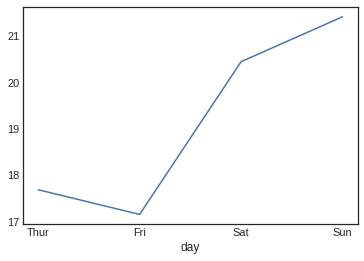

In [22]:
tips.groupby('day')['total_bill'].mean().plot()

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

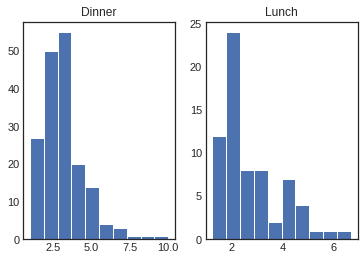

In [23]:
fig, ax = plt.subplots(1, 2)
for i, time in enumerate(tips.time.unique()):
    tips_time = tips[tips['time'] == time]
    ax[i].hist(tips_time['tip'])
    ax[i].set(title=time)

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

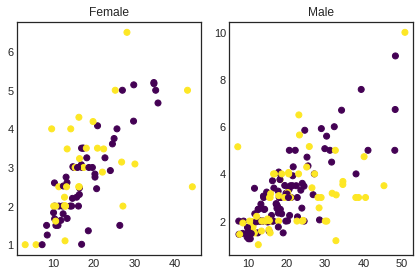

In [24]:
fig, ax = plt.subplots(1, 2)
for i, sex in enumerate(tips.sex.unique()):
    tips_sex = tips[tips.sex == sex]
    ax[i].scatter(
        tips_sex['total_bill'], 
        tips_sex['tip'], 
        c=tips_sex['smoker'],
        cmap='viridis')
    ax[i].set(title=sex)
fig.tight_layout()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

1. Данные имеются только с четверга по воскресенье. Больше всего чаевых платят на выходных.
2. Среднее количество чаевых не сильно зависит от пола.
3. Суммы чаевых практически практически прямо пропорциональна сумме счета (видно по скаттерплоту).
4. На ужин чаевых оставляют вдвое больше, чем на обед.
5. Мужчины чаще оплачивают счет, чем женщины.